In [5]:
from os import read
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle
data=pd.read_csv("california_housing_train.csv")

data.head()



,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [12]:
data.columns = ['id','age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane','classification']


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              400 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [35]:
data['bgr'].fillna(data['bgr'].mean(), inplace=True) 
data['bp'].fillna(data['bp'].mean(), inplace=True)
data['bu'].fillna(data['bu'].mean(), inplace=True)
data['hemo'].fillna(data['hemo'].mean(), inplace=True)

data['pot'].fillna(data['pot'].mean(), inplace=True)

data['sc'].fillna(data['sc'].mean(), inplace=True)
data['sod'].fillna(data['sod'].mean(), inplace=True)

data['age'].fillna(data['age'].mode()[0], inplace=True)
data['htn'].fillna(data['htn'].mode()[0], inplace=True)
data['pcc'].fillna(data['pcc'].mode()[0], inplace=True)
data['appet'].fillna(data['appet'].mode()[0], inplace=True)
data['al'].fillna(data['al'].mode()[0], inplace=True)
data['pc'].fillna(data['pc'].mode()[0], inplace=True)
data['rbc'].fillna(data['rbc'].mode()[0], inplace=True)
data['cad'].fillna(data['cad'].mode()[0], inplace=True)
data['ba'].fillna(data['ba'].mode()[0], inplace=True)
data['ane'].fillna(data['ane'].mode()[0], inplace=True)
data['sg'].fillna(data['sg'].mode()[0], inplace=True)
data['dm'].fillna(data['dm'].mode()[0], inplace=True)
data['pe'].fillna(data['pe'].mode()[0], inplace=True)
data['sg'].fillna(data['sg'].mode()[0], inplace=True)


In [26]:
catcols=set(data.dtypes[data.dtypes=='0'].index.values)
print(catcols)

set()


In [37]:
for i in catcols:
  print("Columns :",i)
  print(c(data[i]))
  print('*'*120+'\n')

In [33]:
  catcols.remove('rbc')
  catcols.remove('pcv')
  catcols.remove('wc')
  print(catcols)

KeyError: ignored

In [48]:
catcols=['ane','pe','appet','ba','classification','cad','dm','htn','pc', 'pcc','rbc']


In [49]:
from sklearn.preprocessing import LabelEncoder 
for i in catcols:
  print("LABEL ENCODING OF:",i)
  LEi = LabelEncoder()
  print(c(data[i]))
  data[i] = LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

LABEL ENCODING OF: ane
Counter({0: 340, 1: 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pe
Counter({0: 324, 1: 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appet
Counter({0: 318, 1: 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: ba
Counter({0: 378, 1: 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: classification
Counter({0: 248, 2: 150, 1: 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
LABEL ENCODING OF: cad
Counter({1: 364, 2: 34, 0: 2})
Counter({1: 364, 2: 34, 0: 2})
********************

In [51]:
  contcols=set(data.dtypes[data.dtypes!='0'].index.values)
  print(contcols)

{'bgr', 'age', 'pc', 'rbc', 'su', 'wc', 'classification', 'rc', 'hemo', 'pcc', 'sc', 'sod', 'appet', 'ba', 'id', 'bu', 'al', 'cad', 'ane', 'bp', 'sg', 'pot', 'pcv', 'pe', 'htn', 'dm'}


In [52]:
for i in contcols:
    print("Continous Columns:",i)
    print(c(data[i]))
    print("*"*120+'\n')

Continous Columns: bgr
Counter({148.0365168539326: 44, 99.0: 10, 100.0: 9, 93.0: 9, 107.0: 8, 117.0: 6, 140.0: 6, 92.0: 6, 109.0: 6, 131.0: 6, 130.0: 6, 70.0: 5, 114.0: 5, 95.0: 5, 123.0: 5, 124.0: 5, 102.0: 5, 132.0: 5, 104.0: 5, 125.0: 5, 122.0: 5, 121.0: 4, 106.0: 4, 76.0: 4, 91.0: 4, 129.0: 4, 133.0: 4, 94.0: 4, 88.0: 4, 118.0: 4, 139.0: 4, 111.0: 4, 113.0: 4, 120.0: 4, 119.0: 4, 74.0: 3, 108.0: 3, 171.0: 3, 137.0: 3, 79.0: 3, 150.0: 3, 112.0: 3, 127.0: 3, 219.0: 3, 172.0: 3, 89.0: 3, 128.0: 3, 214.0: 3, 105.0: 3, 78.0: 3, 103.0: 3, 82.0: 3, 97.0: 3, 81.0: 3, 138.0: 2, 490.0: 2, 208.0: 2, 98.0: 2, 204.0: 2, 207.0: 2, 144.0: 2, 253.0: 2, 141.0: 2, 86.0: 2, 360.0: 2, 163.0: 2, 158.0: 2, 165.0: 2, 169.0: 2, 210.0: 2, 101.0: 2, 153.0: 2, 213.0: 2, 424.0: 2, 303.0: 2, 192.0: 2, 80.0: 2, 110.0: 2, 96.0: 2, 85.0: 2, 83.0: 2, 75.0: 2, 423.0: 1, 410.0: 1, 380.0: 1, 157.0: 1, 263.0: 1, 173.0: 1, 156.0: 1, 264.0: 1, 159.0: 1, 270.0: 1, 162.0: 1, 246.0: 1, 182.0: 1, 146.0: 1, 425.0: 1, 250.0: 

In [68]:
contcols.add('sg')
contcols.add('al')
contcols.add('sg')
print(contcols)

{'bgr', 'age', 'pc', 'rbc', 'su', 'wc', 'classification', 'rc', 'hemo', 'pcc', 'sc', 'white_blood_cell_count', 'sod', 'appet', 'ba', 'red_blood_cell_count', 'id', 'bu', 'cad', 'ane', 'al', 'bp', 'sg', 'packed_cell_volume', 'pot', 'pcv', 'pe', 'htn', 'dm'}


In [64]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count') 
print(contcols)

{'bgr', 'age', 'pc', 'rbc', 'su', 'wc', 'classification', 'rc', 'hemo', 'pcc', 'sc', 'white_blood_cell_count', 'sod', 'appet', 'ba', 'red_blood_cell_count', 'id', 'bu', 'cad', 'ane', 'bp', 'packed_cell_volume', 'pot', 'pcv', 'pe', 'htn', 'dm'}


In [75]:
data['cad'] = data.cad.replace('\tno','no') 
c(data['cad'])

Counter({1: 364, 2: 34, 0: 2})

In [84]:
data['dm'] = data.dm.replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})

c(data['dm'])

Counter({4: 134, 3: 260, 2: 1, 0: 3, 1: 2})

In [85]:
data.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,sod,pot,hemo,htn,dm,cad,appet,pe,ane,classification
count,400.000000,400.000000,400.000000,400.000000,400.00000,351.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.469072,1.017712,0.90000,0.450142,0.882500,0.810000,0.105000,0.055000,...,137.528754,4.627244,12.526437,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000
std,115.614301,17.022008,13.476298,0.005434,1.31313,1.099191,0.322418,0.392792,0.306937,0.228266,...,9.204273,2.819783,2.716171,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,135.000000,4.000000,10.875000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,137.528754,4.627244,12.526437,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,141.000000,4.800000,14.625000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,...,163.000000,47.000000,17.800000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000


<ipython-input-86-868c85374ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

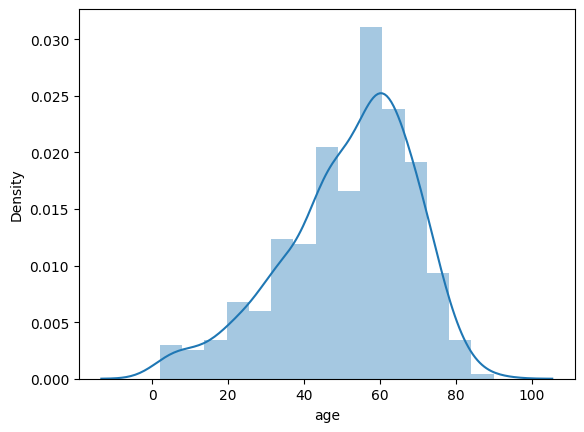

In [86]:
sns.distplot(data.age)

Text(0.5, 1.0, 'age vs blood Scatter Plot')

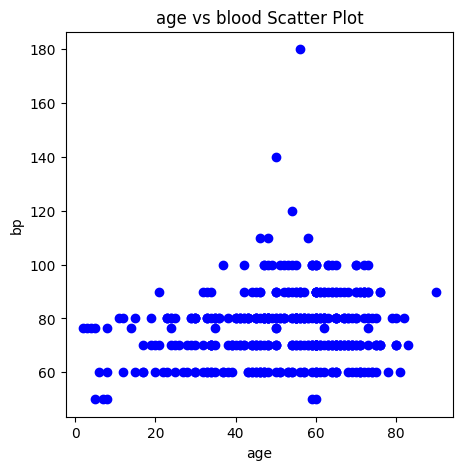

In [91]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5)) 
plt.scatter(data['age'],data['bp'],color='blue') 
plt.xlabel('age')
plt.ylabel('bp') 
plt.title("age vs blood Scatter Plot")

TypeError: ignored

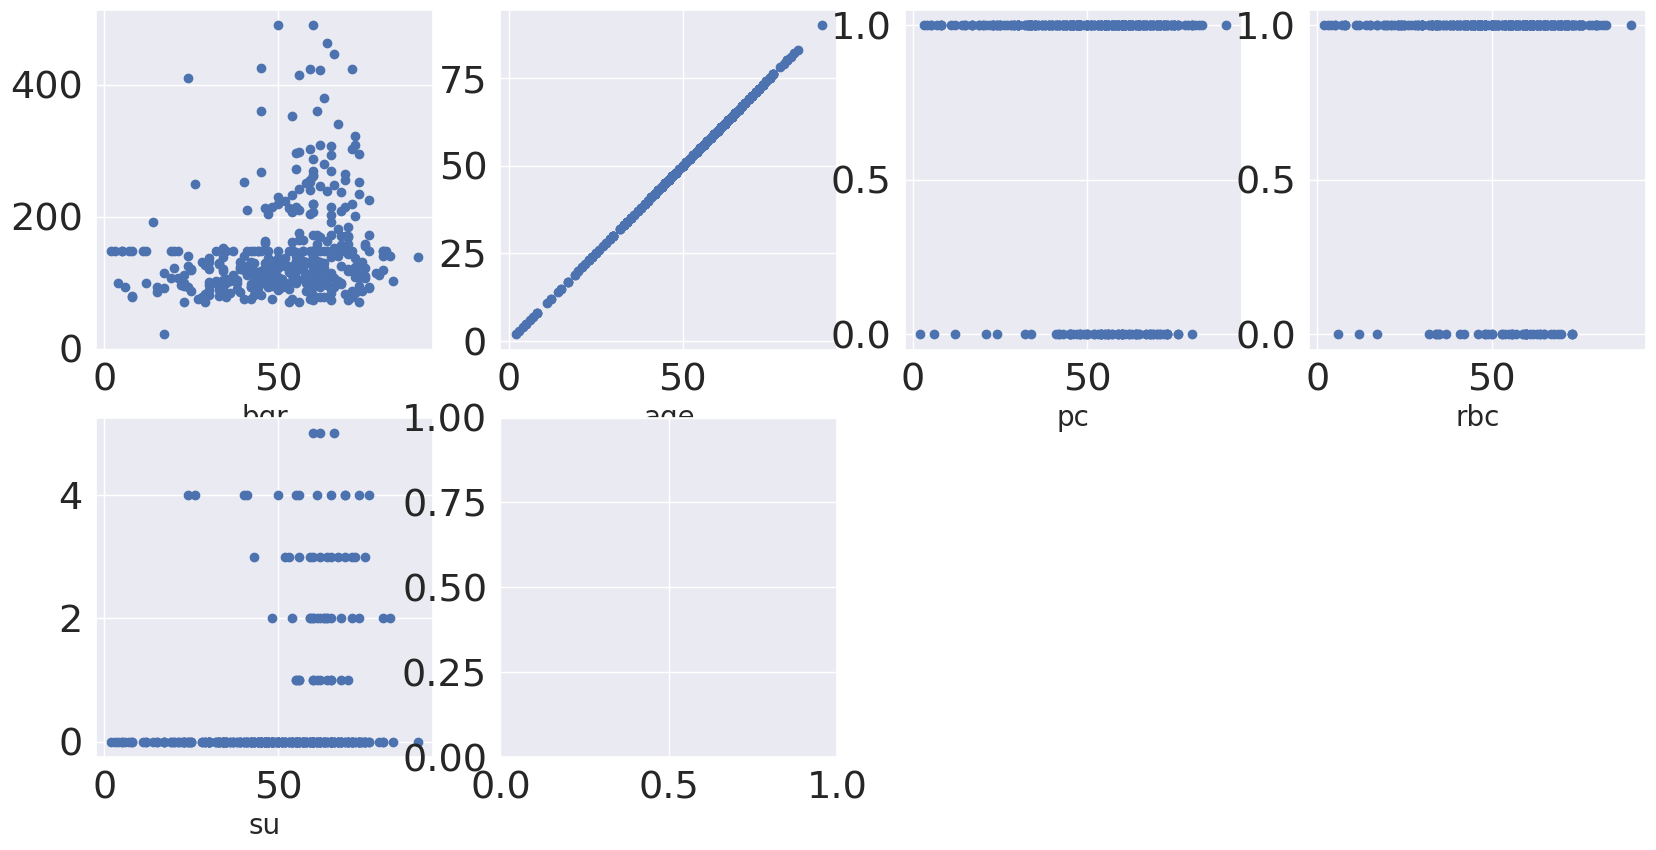

In [271]:
plt.figure(figsize=(20, 15), facecolor='white')
plotnumber = 1

for column in contcols:
    if plotnumber <=11 :
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(data['age'],data[column])
        plt.xlabel(column,fontsize=20)

        plotnumber+=1
plt.show()


<ipython-input-126-e8d9004f5c7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")


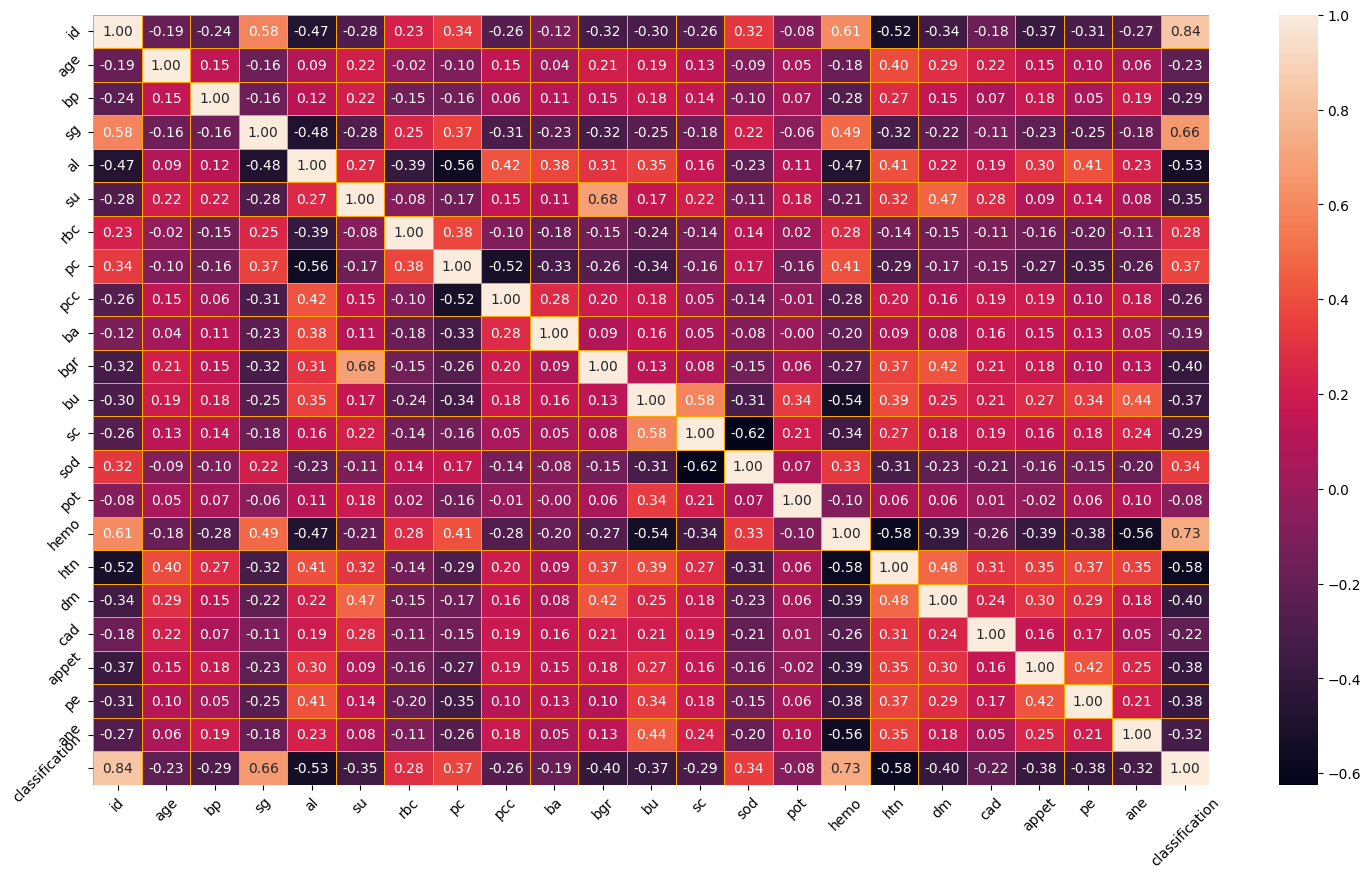

In [126]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

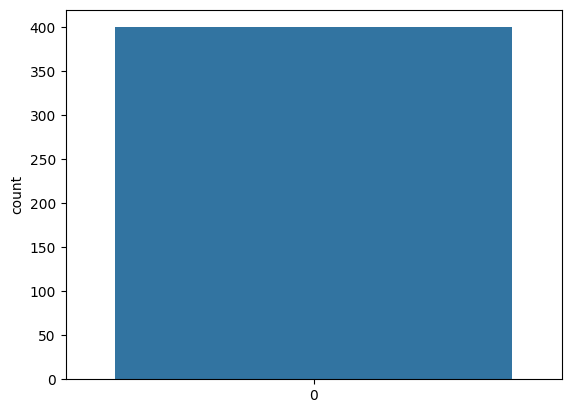

In [128]:
sns.countplot(data['classification'])

In [136]:
from sklearn.preprocessing import StandardScaler
x = np.random.rand(100, 5) 
sc=StandardScaler()
x_bal=sc.fit_transform(x)

In [167]:
selcols=['rbc','pc','bgr','bu','pe','ane','dm','cad']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['classification'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [169]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [170]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [171]:
      classification = Sequential()
      classification.add(Dense(30,activation='relu'))
      classification.add(Dense(128,activation='relu'))
      classification.add(Dense(64,activation='relu'))
      classification.add(Dense(32,activation='relu'))
      classification.add(Dense(1,activation='sigmoid'))

In [172]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [173]:
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
26/26 [==============================] - 2s 13ms/step - loss: 1.5189 - accuracy: 0.2305 - val_loss: 1.6179 - val_accuracy: 0.6562
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 1.0450 - accuracy: 0.3164 - val_loss: 1.1839 - val_accuracy: 0.1719
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 1.1263 - accuracy: 0.2227 - val_loss: 1.0218 - val_accuracy: 0.6562
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 1.4626 - accuracy: 0.3242 - val_loss: 0.7305 - val_accuracy: 0.5312
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 0.9727 - accuracy: 0.3164 - val_loss: 0.6789 - val_accuracy: 0.1875
Epoch 6/100
26/26 [==============================] - 0s 5ms/step - loss: 0.5067 - accuracy: 0.2695 - val_loss: 0.3871 - val_accuracy: 0.3906
Epoch 7/100
26/26 [==============================] - 0s 5ms/step - loss: 0.3642 - accuracy: 0.2227 - val_loss: 0.7248 - val_accuracy: 0.6250
Epoch 8/100


In [174]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')



In [175]:
rfc.fit(x_train,y_train)

<ipython-input-175-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [176]:
y_predict = rfc.predict(x_test) 

In [177]:
y_predict = rfc.predict(x_train)

In [178]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [179]:
 dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [181]:
y_predict = dtc.predict(x_test) 
y_predict

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0])

In [184]:
y_predict_train = dtc.predict(x_train)

In [187]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [189]:
from sklearn.metrics import accuracy_score,classification_report
y_predict = lgr.predict(x_test)

In [191]:
      y_pred = lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])
      print(y_pred) 
      (y_pred)

[2]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [192]:
      y_pred = dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])
      print(y_pred) 
      (y_pred)

[2]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [194]:
      y_pred = rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])
      print(y_pred)
      (y_pred)

[2]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [195]:
classification.save("ckd.h5")

In [197]:
      y_pred = classification.predict(x_test)
     

3/3 [==============================] - 0s 4ms/step


In [198]:
 y_pred
 

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [199]:
      y_pred = (y_pred > 5.0)
      y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [201]:
      def predict_exit(sample_value):
        sample_value = np.array(sample_value)
        sample_value = sample_value.reshape(1,-1)
        sample_value = sc.transform(sample_value)
        return classifier.predict(sample_value)

In [202]:
        test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
        if test==1:
           print('Prediction: High chance of CKD!')
        else:
          print('Prediction: Low chance of CKD.')

1/1 [==============================] - 0s 403ms/step
Prediction: High chance of CKD!


In [203]:
          from sklearn import model_selection

In [264]:
dfs = []
models = [
          ('LogReg', LogisticRegression()),
          ('RF', RandomForestClassifier()),
          ('DecisionTree', DecisionTreeClassifier())
        ]

results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['NO CKD', 'CKD']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        print(name)
print(classification_report(y_test, y_pred, target_names=target_names))
results.append(cv_results)
names.append(name)
this_df = pd.DataFrame(cv_results)
dfs.append(this_df)
final = pd.concat(dfs, ignore_index=True)
return final


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent cal

LogReg


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 76, in _cached_call
    return cache[method]
KeyError: 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 78, in _cached_call
    result = getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  

RF


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 76, in _cached_call
    return cache[method]
KeyError: 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 78, in _cached_call
    result = getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  

DecisionTree


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 76, in _cached_call
    return cache[method]
KeyError: 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 78, in _cached_call
    result = getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  

ValueError: ignored

In [214]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]])

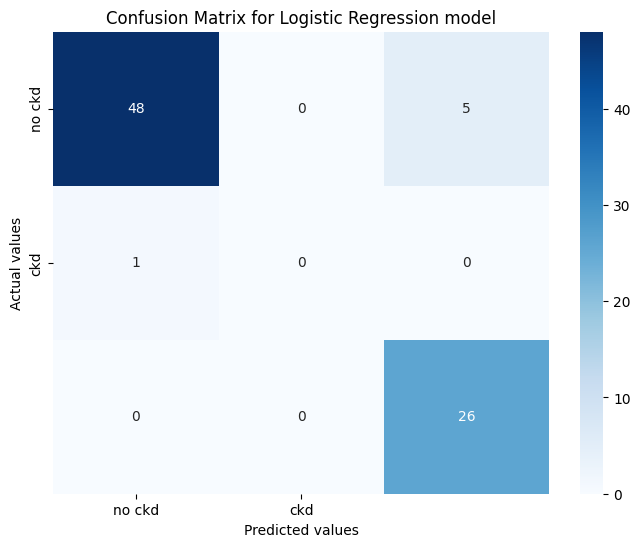

In [216]:
       plt.figure(figsize=(8,6))
       sns.heatmap(cm, cmap='Blues',annot=True,xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd']) 
       plt.xlabel('Predicted values')
       plt.ylabel('Actual values') 
       plt.title('Confusion Matrix for Logistic Regression model')
       plt.show()

In [218]:

       from sklearn.metrics import confusion_matrix
       cm = confusion_matrix(y_test, y_predict)
       cm

array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]])

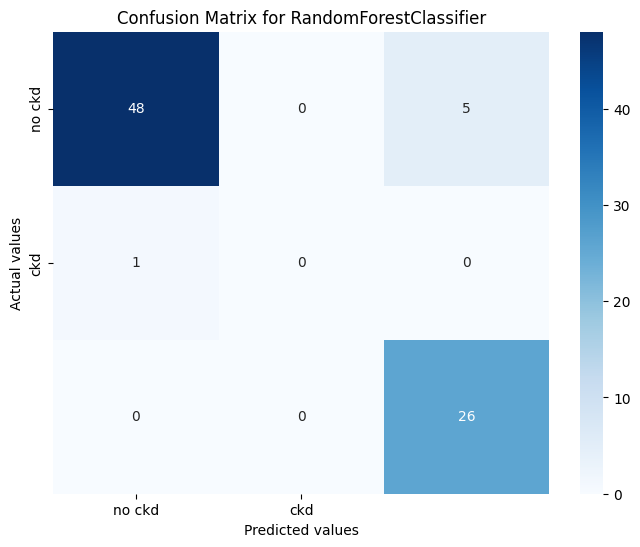

In [222]:
       plt.figure(figsize=(8,6))
       sns.heatmap(cm, cmap= 'Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
       plt.xlabel('Predicted values')
       plt.ylabel('Actual values')
       plt.title('Confusion Matrix for RandomForestClassifier')
       plt.show()

In [224]:
       from sklearn.metrics import confusion_matrix
       cm = confusion_matrix(y_test, y_predict)
       cm

array([[48,  0,  5],
       [ 1,  0,  0],
       [ 0,  0, 26]])

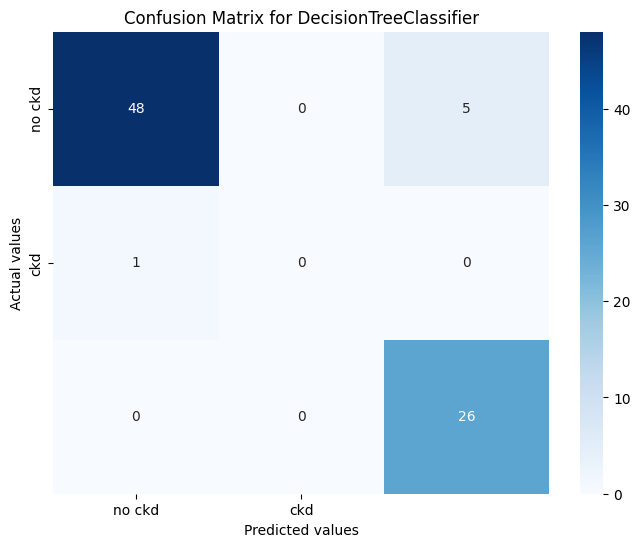

In [226]:
       plt.figure(figsize=(8,6))
       sns.heatmap(cm, cmap = 'Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
       plt.xlabel('Predicted values')
       plt.ylabel('Actual values')
       plt.title('Confusion Matrix for DecisionTreeClassifier')
       plt.show()

In [269]:
bootstraps = []
for model in list(set (final.model.values)):
    model_df = final.loc[final.model == model] 
    bootstraps = model_df.sample (n=30, replace=True) 
    bootstraps.append(bootstrap)

bootstrap_df = pd.concat (bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics',value_name='values') 
time_metrics = ['fit_time','score_time']
results_long_nofit = results_long.loc[results_long['metrics'].isin(time_metrics)] 
results_long_nofit = results_long_nofit.sort_values(by='values')
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] 
results_long_fit = results_long_fit.sort_values(by='values')

NameError: ignored

In [240]:
          import matplotlib.pyplot as plt 
          import seaborn as sns
          plt.figure(figsize= (20, 12)) 
          sns.set(font_scale=2.5)
          g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3") 
          plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
          plt.title('Comparison of Model by Classification Metric') 
          plt.savefig('./benchmark_models_performance.png',dpi=300)

NameError: ignored

<Figure size 2000x1200 with 0 Axes>

In [243]:
 pickle.dump(lgr, open('CKD.pkl','wb'))

In [ ]:


          from flask import Flask, render_template, request
          import pickle
          app = Flask(__name__)
          model = pickle.load(open('CKD.pkl,'rb))
          @app.route('/')
          def home():
            return render_template('home.html')
@app.route('/Prediction',methods=['POST','GET'])
            def prediction():
              return render_template('indexnew.html') 
@app.route('/Home',methods=['POST', 'GET']) 
              def my_home() :
                return render_template ('home. html')
 @app.route(' /predict',methods=[ 'POST'])
 input_features = [floatt(x) for x in request.form.values()] 
 features_value = [np.array(input features)]
 features_name = ['blood_urea', 'blood glucose random', 'anemia', ' coronary_artery_disease' , 'pus_cell', 'red_blood_cells', 'diabetesmellitus ', 'pedal_edema']
 df = pd.DataFrame(features_value, columns=features_name)
 output = model.predict(df)
 return render_template('result.html',prediction_text=output)
 if __name__=='__main__':
   app.run(debug=True)